<a href="https://colab.research.google.com/github/bizarrenebula/tensor_cifar10/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load libraries


import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# load CIFAR-10 dataset


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# information about train and test data


print(f'Shape of train images array {x_train.shape}')
print(f'Shape of train labels array {y_train.shape}')
print(f'Shape of test images array {x_test.shape}')
print(f'Shape of test labels array {y_test.shape}')

Shape of train images array (50000, 32, 32, 3)
Shape of train labels array (50000, 1)
Shape of test images array (10000, 32, 32, 3)
Shape of test labels array (10000, 1)


In [ ]:
# name the labels


labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [ ]:
# generate a random sample of 16


import random

random.seed(1)
train_idx = [i for i in range(len(y_train))]
samples = random.sample(train_idx, 16)

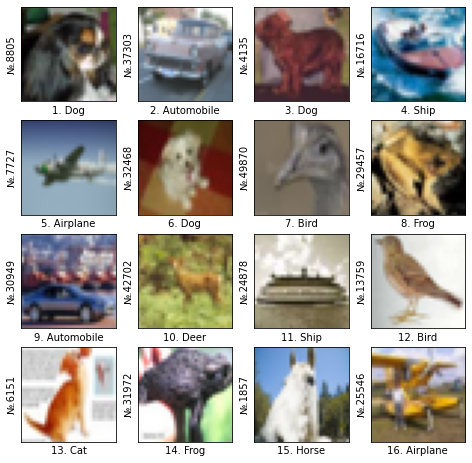

In [ ]:
# display 16 random images


plt.figure(figsize=(8,8))
for i,sample in enumerate(samples):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  img = x_train[sample]
  plt.imshow(img[:,:,:])
  plt.xlabel(f'{i+1}. {labels[int(y_train[sample])]}')
  plt.ylabel(f'№.{sample}')
plt.show()

In [ ]:
# prepare data for model build


# convert image arrays to floating points
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# initiate model


model = tf.keras.Sequential()


# add layers

model.add(layers.Conv2D(32, (2, 2), input_shape=(32,32,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
 
model.add(layers.Conv2D(32, (2, 2)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
 
model.add(layers.Conv2D(64, (2, 2)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
 
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.add(layers.Activation('sigmoid'))

Epoch 1/10
1407/1407 [==============================] - 74s 31ms/step - loss: 1.5909 - accuracy: 0.4193 - val_loss: 1.3470 - val_accuracy: 0.5080
Epoch 2/10
1407/1407 [==============================] - 53s 38ms/step - loss: 1.4099 - accuracy: 0.4922 - val_loss: 1.2062 - val_accuracy: 0.5760
Epoch 3/10
1407/1407 [==============================] - 53s 38ms/step - loss: 1.3043 - accuracy: 0.5325 - val_loss: 1.1333 - val_accuracy: 0.5978
Epoch 4/10
1407/1407 [==============================] - 58s 41ms/step - loss: 1.2292 - accuracy: 0.5640 - val_loss: 1.0552 - val_accuracy: 0.6206
Epoch 5/10
1407/1407 [==============================] - 62s 44ms/step - loss: 1.1648 - accuracy: 0.5878 - val_loss: 1.0395 - val_accuracy: 0.6336
Epoch 6/10
1407/1407 [==============================] - 71s 51ms/step - loss: 1.1167 - accuracy: 0.6062 - val_loss: 0.9548 - val_accuracy: 0.6602
Epoch 7/10
1407/1407 [==============================] - 75s 53ms/step - loss: 1.0717 - accuracy: 0.6221 - val_loss: 0.9926 -

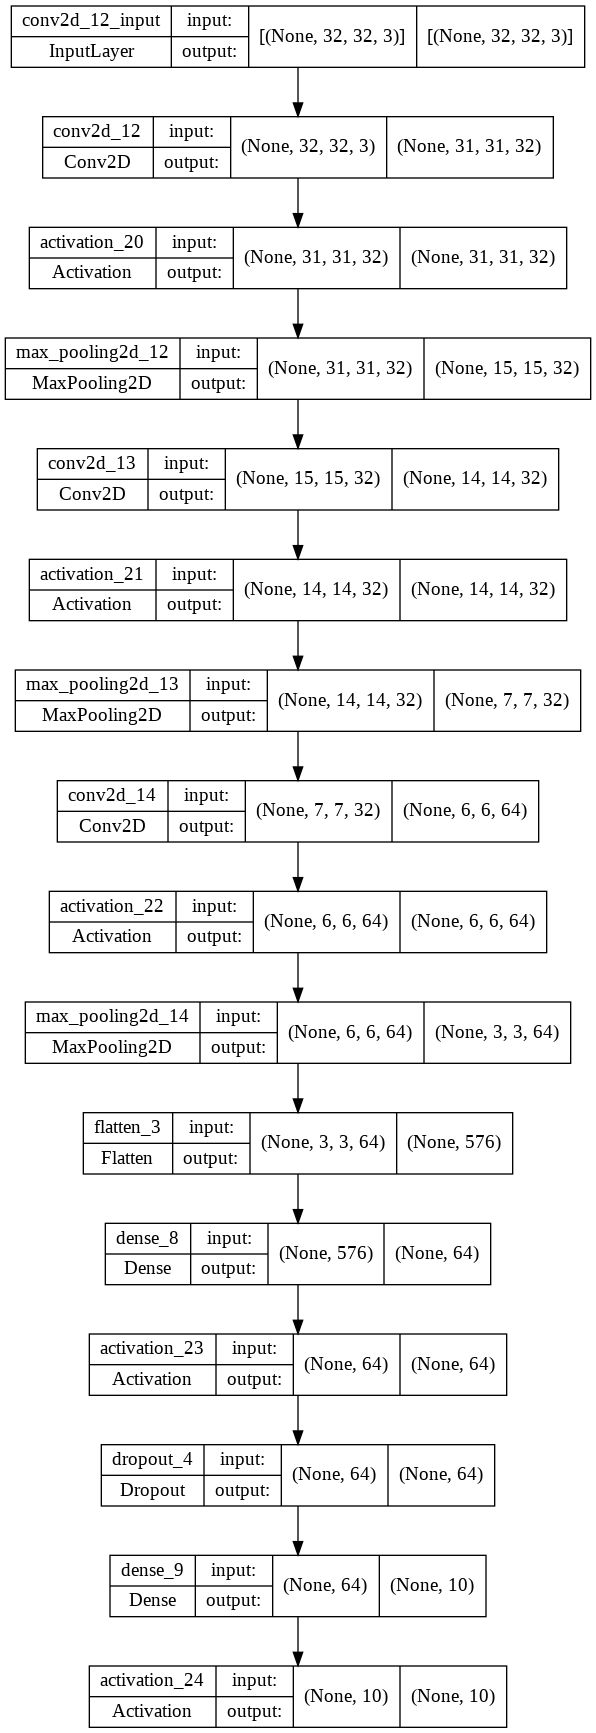

In [ ]:
# compile


model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# train 


model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


# model info


model.summary()


# display schema
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="TB")

In [ ]:
# test with a sample image


image_id = 7214

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

prediction_values = list(predictions[image_id])

predicted_label = np.argmax(predictions[image_id])
predicted_image = x_test[image_id]
true_label = int(y_test[image_id])

plt.figure(figsize=(3,3))
plt.xticks([])
plt.yticks([])
plt.imshow(predicted_image)
plt.xlabel(f'{labels[predicted_label]} {100*np.max(prediction_values):2.0f}% True:{(labels[true_label])}')
plt.show()